## Cancer Breast prediction using Logistic regression

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# For visualizations we will use ggplot stlye and Century Gothic as font family
plt.rcParams['font.family'] = 'Century Gothic' 

In [2]:
# Import and visualize the dataset
breast_cancer_df = pd.read_csv('./Datasets/breast_cancer.csv')
breast_cancer_df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Explore the dataset information
print(f'The dataset contains {breast_cancer_df.shape[0]} rows')
print(f'The dataset contains {breast_cancer_df.shape[1]} columns')

The dataset contains 569 rows
The dataset contains 32 columns


In [4]:
# The goal is to predict the diagnosis
# There are 2 clases of tumors: Benign(B), Malignant(M)  
breast_cancer_df.groupby(by='Diagnosis').count()['ID']

Diagnosis
B    357
M    212
Name: ID, dtype: int64

In [5]:
# Check if there are missing values
breast_cancer_df.isnull().sum()

ID                         0
Diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean  concave points       0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
# Review most outstanding statistics for each class of tumors
# Statistics for B tumors
breast_cancer_df[breast_cancer_df['Diagnosis'] == 'B'].describe()

,ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [7]:
# Statistics for M tumors
breast_cancer_df[breast_cancer_df['Diagnosis'] == 'M'].describe()

,ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [8]:
# The model requires the target variable to be a binary column. 
# Transform M to 1, and B to 0
breast_cancer_df['Diagnosis'] = breast_cancer_df['Diagnosis'].map({'M': 1, 'B':0})
breast_cancer_df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Creating the model

### 1. Logistic regression algorithm

In [9]:
# Select target column and predictors matrix
# In this case, the analysis will only include the mean columns (2-12)
X = breast_cancer_df[['worst area', 'worst smoothness', 'mean texture']]
y = breast_cancer_df['Diagnosis']

# Scale data using standardization (Z-Score)
mean_values_X = X.mean()
std_dev_values_X = X.std()
X_standardized = (X - mean_values_X) / std_dev_values_X

In [10]:
# This function makes the predictions for the model using sigmoid function
def sigmoid(theta, X_b):
    z = X_b.dot(theta)
    predictions = 1 / (1 + np.exp(-z))
    return predictions

In [11]:
# This function calculates the cross entropy loss
def cross_entropy(predictions, y):
    cost = -1/len(y) * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    return cost

In [12]:
# This function updates parameters using gradient descend
def gradient_descend(X_b, learning_rate, error, theta):
    gradient = X_b.T.dot(error) / len(X)
    theta -= learning_rate * gradient
    return theta

In [13]:
# Initialize model parameters
theta = np.zeros((X.shape[1] + 1, ))
learning_rate = 0.05
epochs = 500

# Create an empty list to store cross entropy loss values
entropy = []

# Add bias column to X matrix
X_b = np.c_[np.ones((len(X_standardized), 1)), X_standardized]

for i in range(epochs):
    
    # Sigmoid function
    predictions = sigmoid(theta, X_b)
    
    # Calculate error
    error = predictions - y

    # Calculate cross entropy loss
    cost = cross_entropy(predictions, y)
    entropy.append(cost)

    # Calculate the gradient and update parameters
    theta = gradient_descend(X_b, learning_rate, error, theta)

In [14]:
# Make final predictions
final_predictions = sigmoid(theta, X_b)

In [15]:
# Define the threshold for the model and return results in binary format [0,1]
threshold = 0.39
binary_predictions = (final_predictions >= threshold).astype(int)

In [16]:
# Evaluate model accuracy
accuracy = np.mean(binary_predictions == y)*100
print(f'The model accuracy is {accuracy:.2f}%')

The model accuracy is 95.78%


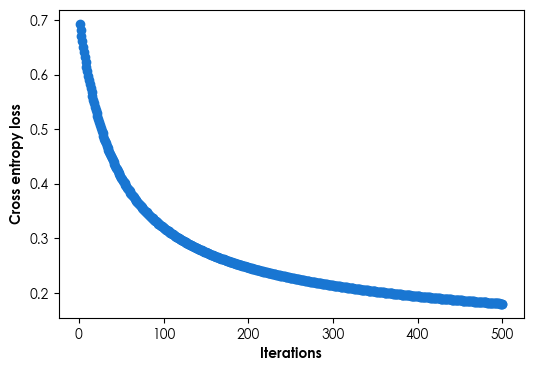

In [17]:
# Visualize the cross entropy loss along iterations
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), entropy, marker='o', linestyle='-', color='#1976D2', linewidth=1)
plt.xlabel('Iterations', fontweight='bold')
plt.ylabel('Cross entropy loss', fontweight='bold')
plt.show()

#### 1.1 Further analysis exploration

In [18]:
# Create a new dataframe and append the predictions
predictions_df = breast_cancer_df.copy()
predictions_df.insert(2, 'Prediction', binary_predictions)

In [19]:
# For now, just visualize the wrong predictions
wrong_predictions = predictions_df[predictions_df['Diagnosis'] != predictions_df['Prediction']]
print(f'There are {len(wrong_predictions)} wrong predictions in the model')
wrong_predictions.iloc[:, :3].head(10)

There are 24 wrong predictions in the model


,ID,Diagnosis,Prediction
13,846381,1,0
22,8511133,1,0
38,855133,1,0
40,855167,1,0
73,859983,1,0
86,86135501,1,0
109,864018,0,1
135,868202,1,0
146,869691,1,0
197,877159,1,0


### 2. Logistic regression using scikit learn

In [20]:
# Import sckit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [21]:
# Select target column and predictors matrix
# In this case, the analysis will only include the mean columns (2-12)
X = breast_cancer_df[['worst area', 'worst smoothness', 'mean texture']]
y = breast_cancer_df['Diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions and return in float format
y_predictions = model.predict_proba(X_test_scaled)

# Define threshold and return predictions in binary format
threshold = 0.4
y_pred = (y_predictions[:, 1] >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)

print(f'The model accuracy is {accuracy*100:.2f} %')

accuracies_cv = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=10)
print("Estimated accuracy using 10 cross validations: {:.2f}%".format(accuracies_cv.mean() * 100))

The model accuracy is 97.37 %
Estimated accuracy using 10 cross validations: 96.71%


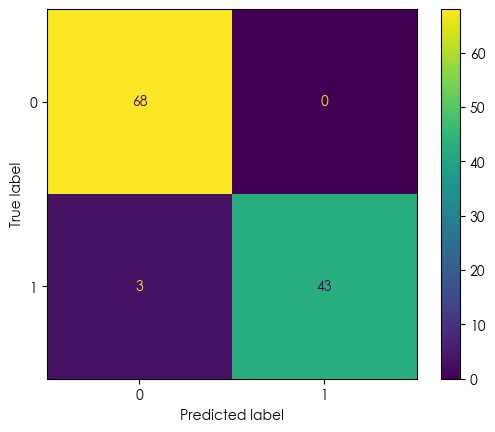

In [22]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix)
disp.plot()
plt.show()

Interpreting the results: According to the confusion matrix the model has only two wrong predictions. For Benign tumors (0) the model did it good 68 times with no wrong predictions; For Malignant (1) tumors, the model made 43 good predictions but made 3 mistakes.